In [54]:
import pandas as pd
from scipy.stats import ks_2samp
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [55]:
df = pd.read_csv('/Users/tatianasalamatova/reps/MTS_data_analysis/opymp/human_stats.csv',sep = ';')
df['age_years'] = df['age'] // 365

In [56]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


# Вопрос №1

На основе результатов теста Колмогорова-Смирнова проверьте нормальность распределения возрастов для двух групп: людей с заболеваниями сердца и без заболеваний сердца. Какой вывод можно сделать на основе полученных данных?

__Варианты ответов__:
* Распределения возрастов для обеих групп нормальные.
* Распределения возрастов для обеих групп не нормальные. (ВЕРНЫЙ)
* Распределение возраста для группы с заболеваниями сердца нормальное, а для группы без заболеваний сердца — ненормальное.
* Распределение возраста для группы с заболеваниями сердца ненормальное, а для группы без заболеваний сердца — нормальное.

In [57]:
group_with_cardio = df[df['cardio'] == 1]['age']
group_without_cardio = df[df['cardio'] == 0]['age']

# Проверка нормальности распределения для каждой группы с помощью критерия Колмогорова-Смиронова
stat_with_cardio, p_value_with_cardio = kstest(group_with_cardio, 'norm', args=(group_with_cardio.mean(), group_with_cardio.std()))
stat_without_cardio, p_value_without_cardio = kstest(group_without_cardio, 'norm', args=(group_without_cardio.mean(), group_without_cardio.std()))

# Выводим результаты
print(f"Для группы с заболеваниями сердца: статистика = {stat_with_cardio:.4f}, p-значение = {p_value_with_cardio:.4f}")
print(f"Для группы без заболеваний сердца: статистика = {stat_without_cardio:.4f}, p-значение = {p_value_without_cardio:.4f}")

Для группы с заболеваниями сердца: статистика = 0.0708, p-значение = 0.0000
Для группы без заболеваний сердца: статистика = 0.0594, p-значение = 0.0000


Как показывают результаты теста, распределения возраста для обеих групп не являются нормальными.

# Вопрос №2 

На основе данных о возрасте людей с заболеваниями сердца и без заболеваний сердца, проведите проверку гипотезы о равенстве распределений возрастов в этих группах с использованием непараметрического критерия Колмогорова-Смирнова. Какой вывод можно сделать на основе полученных результатов?

__Варианты ответов__:

* Гипотеза о равенстве распределений отвергается, возрастные распределения различаются. (ВЕРНЫЙ)
* Гипотеза о равенстве распределений не отвергается, возрастные распределения одинаковы.
* Не удается определить различия в распределении возрастов между группами с использованием критерия Колмогорова-Смирнова.

In [58]:
# Применим критерий Колмогорова-Смирнова для проверки равенства распределений
ks_stat, p_value = ks_2samp(group_with_cardio, group_without_cardio)

print(f"KS-Statistic: {ks_stat}")
print(f"P-value: {p_value}")

# Проверка гипотезы
if p_value < 0.05:
    print("Гипотеза о равенстве распределений отвергается")
else:
    print("Гипотеза о равенстве распределений не отвергается")

KS-Statistic: 0.19536468175985688
P-value: 0.0
Гипотеза о равенстве распределений отвергается


Это график просто для проверяющих

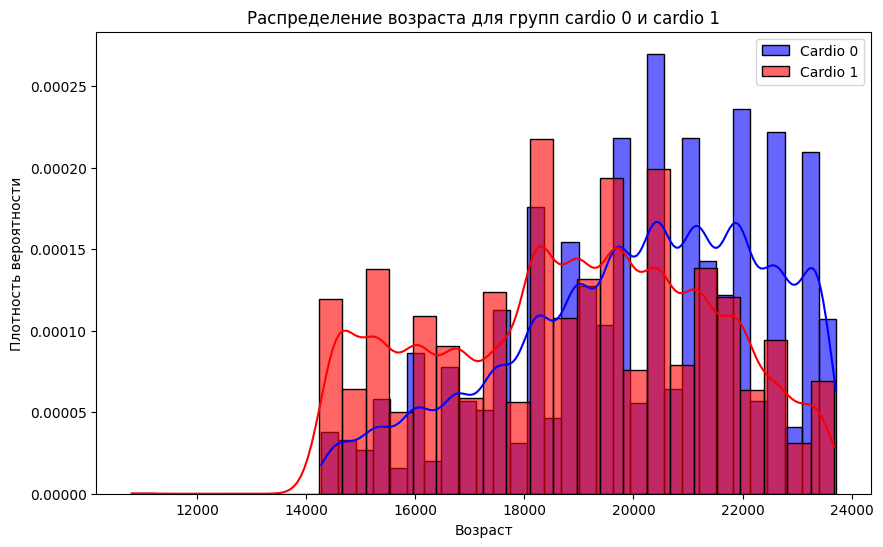

In [59]:
plt.figure(figsize=(10, 6))

sns.histplot(group_with_cardio, color='blue', kde=True, stat="density", label="Cardio 0", alpha=0.6, bins=30)
sns.histplot(group_without_cardio, color='red', kde=True, stat="density", label="Cardio 1", alpha=0.6, bins=30)

plt.title('Распределение возраста для групп cardio 0 и cardio 1')
plt.xlabel('Возраст')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()

# Вопрос №3

Найдите среднее количество полных лет у людей, имеющих заболевания сердца, и у людей, не имеющих заболеваний сердца. Високосный год не учитывайте. Ответ запишите через пробел: среднее количество полных лет у людей с заболеваниями сердца и среднее количество полных лет у людей без заболеваний сердца.

Ответ: 54 51

In [60]:
group_years_with_cardio = df[df['cardio'] == 1]['age_years']
group_years_without_cardio = df[df['cardio'] == 0]['age_years']

print(f'Среднее значение для людей с кардио {round(group_years_with_cardio.mean())=}')
print(f'Среднее значение для людей БЕЗ кардио {round(group_years_without_cardio.mean())=}')

Среднее значение для людей с кардио round(group_years_with_cardio.mean())=54
Среднее значение для людей БЕЗ кардио round(group_years_without_cardio.mean())=51


# Проверяется вручуную

# Вопрос №4

Задание:

На основе предоставленных данных сформулируйте и проверьте гипотезы о частоте употребления алкоголя и сигарет среди мужчин и женщин.

В ответе укажите:

1) Нулевую и альтернативную гипотезы для каждой переменной (алкоголь и курение)
2) Код на Python для выполнения анализа
3) Укажите, какой непараметрический критерий для проверки гипотез был использован
4) Укажите, отверглась ли нулевая гипотеза или нет

# Примерный ответ:

1) Нулевую и альтернативную гипотезы

$H_0$: Мужчины и женщины одинаково часто употребляют алкоголь и курят, т.е. частота потребления алкоголя и курения не зависит от пола

$H_1$: Частота потребления алкоголя и курения зависит от пола

3) Какой непараметричесеий критерий для проверки гипотез вы использовали?
Критерий: chi^2 (Криетрий Пирсона)

4) Отверглась или не отверглась нулевая гипотеза?

Отвергаем нулевую гипотезу.

# 2 Код на python

In [ ]:
# таблицы сопряженности для проверки гипотезы по курению и алкоголю
contingency_smoke = pd.crosstab(df['gender'], df['smoke'])
contingency_alco = pd.crosstab(df['gender'], df['alco'])

# Проверка гипотезы для курения
chi2_smoke, p_smoke, dof_smoke, expected_smoke = chi2_contingency(contingency_smoke)

# Проверка гипотезы для алкоголя
chi2_alco, p_alco, dof_alco, expected_alco = chi2_contingency(contingency_alco)

print(f'P-value для гипотезы по курению: {p_smoke}')
print(f'Статистика для гипотезы по курению: {chi2_smoke}')
print(f'P-value для гипотезы по алкоголю: {p_alco}')
print(f'Статистика для гипотезы по алкоголю: {chi2_alco}')


P-value для гипотезы по курению: 0.0
Статистика для гипотезы по курению: 8000.974644365797
P-value для гипотезы по алкоголю: 0.0
Статистика для гипотезы по алкоголю: 2044.4771551228887


# Вопрос №5

Используя предоставленные данные, определите, кто больше курит и кто больше пьет: мужчины или женщины. Укажите свой ответ в формате: "пол;пол"

Ответ: мужчины;мужчины